# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования** — определение влияния различных факторов на стоимость квартиры

**Ход исследования**

Данные о клиентах, которым выдан кредит находятся в файле `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

На этапе предобработки необходимо будет определить и обработать пропуски и привести данные в столбцах к нужным типам.

На этапе дополнения таблицы необходимо посчитать цену квадратного метра, дату публикации объявления, этаж квартиры (первый, последний, другой), соотношение жилой и общей площади, а также отношение площади кухни к общей площади.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчёты и добавление результатов в таблицу.
 4. Исследовательский анализ данных.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
advertisements = pd.read_csv('/datasets/real_estate_data.csv')
display(advertisements.head(10))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


По виду таблицы можно понять, что разделителями в таблице являются знаки табуляции

In [3]:
advertisements = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(advertisements.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
advertisements.info()
display(advertisements.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


В таблице 22 столбца.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;  
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.

**Замечания к данным:**
1. Пропуски в таблице в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. Исходя из данных в таблице, необходимо заполнить эти пропуски;
2. Необходимо оптимизировать типы данных в таблице;
3. Минимальное значение по столбцу `ceiling_height` = 1, а максимальное значение = 100. Необходимо будет оценить эти данные;
4. Тип данных в столбце `is_apartment` должен быть булев тип, а на самом деле object.

**Вывод**

В каждой строке таблицы — информация об объявлении о продаже квартир. В столбцах находится информация о расположении, параметрах квартиры, населённом пункте и других данных, которые могут влиять на стоимость квартиры.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Следует их предобработать, проверить наличие дубликатов и устранить проблемы в данных.

## Предобработка данных

### Обработка пропусков

Столбцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` скорее всего были сознательно не заполнены пользователями, поскольку эти данные довольно сложно определить. Адекватной замены этим пропускам нет, поэтому оставим эти пропуски нетронутыми.

Рассмотрим столбец `balcony`.

In [5]:
advertisements['balcony'].isna().sum()

11519

Если человек не указал число балконов — скорее всего, их нет, поэтому заменим пропуски в этом столбце на 0.

In [6]:
advertisements['balcony'] = advertisements['balcony'].fillna(0)
advertisements['balcony'].isna().sum()

0

Оценим данные в столбце `balcony`.

In [7]:
advertisements['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Рассмотрим столбец `is_apartment`.

In [8]:
advertisements['is_apartment'].isna().sum()

20924

В столбце `is_apartment` пропуски в данных скорее всего вознили из-за того, что до некоторого времени жилье не разделяли на апартаменты и жилые помещения. Заменим пропуски на False. Сразу изменим тип данных на boolean

In [9]:
advertisements['is_apartment'] = advertisements['is_apartment'].fillna(0).astype('bool')
advertisements['is_apartment'].isna().sum()

0

In [10]:
advertisements['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Рассмотрим пропуски в столбце `days_exposition`.

In [11]:
advertisements['days_exposition'].isna().sum()

3181

In [12]:
advertisements['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Не будем заполнять эти данные, поскольку это может сильно повлиять на результаты исследования, а логичной замены нет.

Рассмотрим столбец `locality_name`

In [13]:
advertisements['locality_name'].isna().sum()

49

Заполним пропуски словом "неизвестно"

In [14]:
advertisements['locality_name'] = advertisements['locality_name'].fillna('неизвестно')

In [15]:
advertisements['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Проанализировав список уникальных значений видим, что есть два вида скрытых дубликатов: первый связан с использованием "ё\е", второй с тем, что один и тот же населенный пункт может быть записан с разными типами - "село\поселок\деревня".

Напишем функцию, которая поможет нам стандартизировать написание названия населённого пункта.

In [16]:
def fix_duplicates(row):
    """
    Замена в названии населённого пункта буквы "ё" на "е" и преобразования топонимов "село" и "деревня" в "поселок"
    """
    locality_name = row['locality_name']
    if 'ё' in locality_name:
        locality_name = locality_name.replace('ё', 'е')
    for word in ['село ', 'деревня ']:
        if word in locality_name:
            locality_name = locality_name.replace(word, 'поселок ')
    return locality_name

In [17]:
advertisements['locality_name'] = advertisements.apply(fix_duplicates, axis=1)

In [18]:
advertisements['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'поселок Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'поселок Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'поселок Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'поселок Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'поселок Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'поселок Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'поселок Старая',
       'поселок Лесколово', 'поселок Новый Свет

Рассмотрим столбец `floors_total`

In [19]:
advertisements['floors_total'].isna().sum()

86

In [20]:
advertisements['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Всего 86 пропусков. Адекватной замены нет, оставим эти пропуски

Рассмотрим столбец `ceiling_height`

In [21]:
advertisements['ceiling_height'].isna().sum()

9195

In [22]:
advertisements['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В данных довольно много пропусков (опять же не все хотят измерять высоту потолков) + существуют выбросы (неадекватные min и max значения). Можно было бы заменить пропуски медианным значениям по населённому пункту, но это может довольно сильно повлиять на ход исследования, поэтому оставим как есть. Выбросы отбросим на этапе построения графиков.

Рассмотрим столбцы `living_area` и `kitchen_area`.

In [23]:
advertisements['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [24]:
advertisements['living_area'].isna().sum()

1903

In [25]:
advertisements['kitchen_area'].isna().sum()

2278

Эти пропуски также оставим без изменения

**Вывод**

Часть пропусков были заполнены исходя из логики данных, часть оставлены, так как заполнение их медианой или средним значением могло сильно повлиять на исследование

### Обработка дубликатов

Проверим явные дубликаты.

In [26]:
advertisements.duplicated().sum()

0

**Вывод**

Явных дубликатов нет. Дубликатов с учетом регистра тоже нет, так как столбец `locality_name` уже проверен, а больше категориальных данных, кроме логических типов нет.

### Замена типа данных

В этом подпункте заменим тип данных на целочисленный в столбцах `last_price`, `balcony`. Остальные значения можно было бы заменить, но в них остались пропуски. Затем оптимизируем хранение данных во всех других столбцах.

Преобразуем тип данных в целочисленный

In [27]:
converted_columns = ['last_price', 'balcony']
advertisements[converted_columns] = advertisements[converted_columns].astype('int')

Оптимизируем хранение информации

In [28]:
advertisements_int = advertisements.select_dtypes(include=['int'])
converted_int = advertisements_int.apply(pd.to_numeric,downcast='integer')
advertisements[converted_int.columns] = converted_int

advertisements_float = advertisements.select_dtypes(include=['float'])
converted_float = advertisements_float.apply(pd.to_numeric,downcast='float')
advertisements[converted_float.columns] = converted_float

In [29]:
advertisements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int8
last_price              23699 non-null int32
total_area              23699 non-null float32
first_day_exposition    23699 non-null object
rooms                   23699 non-null int8
ceiling_height          14504 non-null float32
floors_total            23613 non-null float32
living_area             21796 non-null float32
floor                   23699 non-null int8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float32
balcony                 23699 non-null int8
locality_name           23699 non-null object
airports_nearest        18157 non-null float32
cityCenters_nearest     18180 non-null float32
parks_around3000        18181 non-null float32
parks_nearest           8079 non-null float32
ponds_around3000        

Преобразуем тип данных в столбце `first_day_exposition` к типу datetime. Во всех записях значения округлены до дня, поэтому часы записывать не имеет смысла.

In [30]:
advertisements['first_day_exposition'] = pd.to_datetime(advertisements['first_day_exposition'], format = '%Y-%m-%d')

**Вывод**

В этом пункте столбцы `last_price`, `balcony` были приведены к целочисленному типу данных, столбец `first_day_exposition` к datetime, а все остальные оптимизированы исходя из диапазонов чисел, хранящихся там.

## Расчёты и добавление результатов в таблицу

Столбцы с отношением жилой и общей площади `living_area_ratio`, а также отношением площади кухни к общей `kitchen_area_ratio` уже добавлены. Остались столбцы с ценой за квадратный метр, днем недели, месяцем и годом публикации объявления, а также категоризированным этажом квартиры

In [31]:
advertisements['price_per_m2'] = (advertisements['last_price'] / advertisements['total_area']).astype('int')

advertisements['weekday_exp'] = advertisements['first_day_exposition'].dt.weekday

advertisements['month_exp'] = advertisements['first_day_exposition'].dt.month

advertisements['year_exp'] = advertisements['first_day_exposition'].dt.year

Создадим функцию для категоризации по этажу

In [32]:
def floor_cat(row):
    """
    Возвращает категорию по этажам:
    - 'первый', если row['floor'] == 1;
    - 'другой', если 1 < row['floor'] < row['floors_total'];
    - 'последний', eсли row['floor'] == row['floors_total'].
    """
    
    if row['floor'] == 1:
        return 'первый'
    elif 1 < row['floor'] < row['floors_total']:
        return 'другой'
    return 'последний'

In [33]:
advertisements['floor_cat'] = advertisements.apply(floor_cat, axis=1)
advertisements.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday_exp,month_exp,year_exp,floor_cat
0,20,13000000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159.000000,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
5,10,2890000,30.400000,2018-09-10,1,NaN,12.0,14.400000,5,False,...,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018,другой
6,6,3700000,37.299999,2017-11-02,1,NaN,26.0,10.600000,6,False,...,0.0,NaN,0.0,NaN,155.0,99195,3,11,2017,другой
7,5,7915000,71.599998,2019-04-18,2,NaN,24.0,NaN,22,False,...,0.0,NaN,0.0,NaN,NaN,110544,3,4,2019,другой
8,20,2900000,33.160000,2018-05-23,1,NaN,27.0,15.430000,26,False,...,NaN,NaN,NaN,NaN,189.0,87454,2,5,2018,другой
9,18,5400000,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,False,...,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017,другой


**Вывод**

Добавлены требующиеся для дальнейших исследований столбцы.

## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [34]:
advertisements['total_area'].describe()

count    23699.000000
mean        60.348648
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

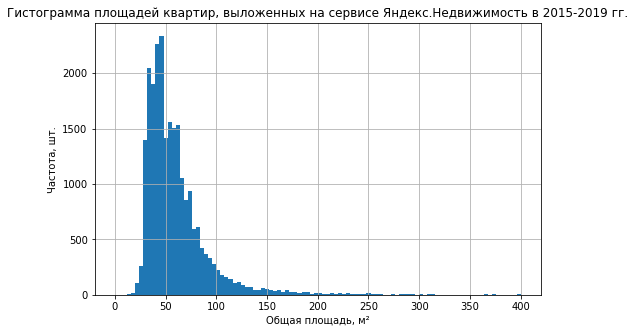

In [35]:
advertisements.plot(y='total_area', kind='hist', bins=100, grid=True, figsize = (8,5), range=(0,400), legend=False)
plt.title('Гистограмма площадей квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Частота, шт.');

Площадь недвижимости находится в диапазоне от 12 до 900 м². Медианное значение - 52 м², среднее - 60.35 м². Распределение площади имеет вид распредления Гаусса.

In [36]:
advertisements['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

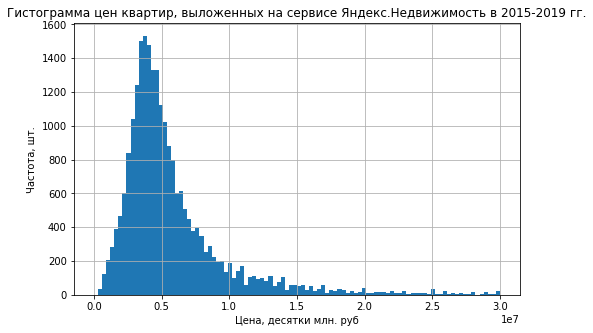

In [37]:
advertisements.plot(y='last_price', kind='hist', bins=100, grid=True, figsize = (8,5), range=(0,3e7), legend=False)
plt.title('Гистограмма цен квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Цена, десятки млн. руб')
plt.ylabel('Частота, шт.');

Цена находится в диапазоне от 12190 до 763000000 руб. Медианное значение - 4.65 млн. руб., среднее - 6.5 млн. руб. Распределение цены имеет вид распредления Гаусса. Минимальное значение - аномальное, следует обратиться к составителям данных.

In [38]:
advertisements['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

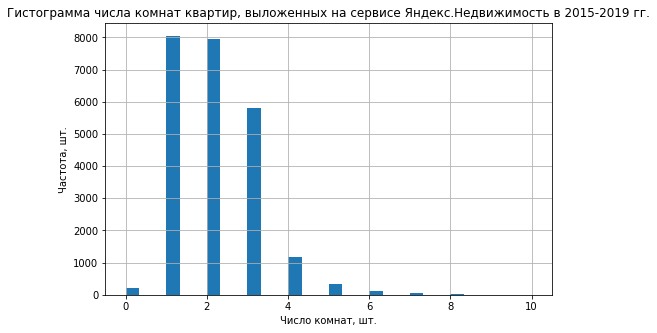

In [39]:
advertisements.plot(y='rooms', kind='hist', grid=True, figsize=(8, 5), range=(0, 10), bins=30, legend=False)
plt.title('Гистограмма числа комнат квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Частота, шт.');

Число комнат находится в диапазоне от 0 до 19. Медианное значение - 2. Минимальное значение - аномальное, следует обратиться к составителям данных.

In [40]:
advertisements['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

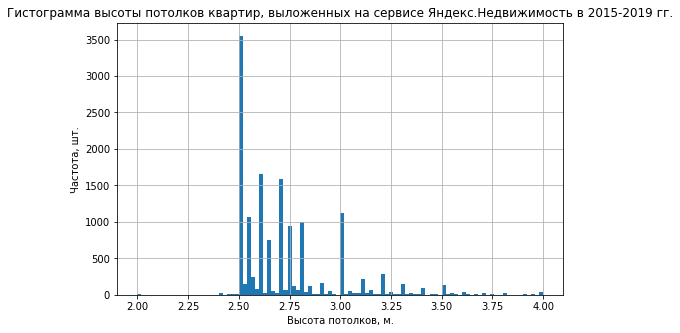

In [41]:
advertisements.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize=(8, 5), range=(2, 4), legend=False)
plt.title('Гистограмма высоты потолков квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Частота, шт.');

Высота потолков находится в диапазоне от 1 до 100 метров. Медианное значение - 2.65 метров, среднее значение - 2.77 метров.  Есть аномальные выбросы, следует обратиться к составителям данных.

**Вывод**

Были построены гистограммы для каждого параметра и определены различные параметры распределения. Описания данных приведены под соответствующими графиками

In [42]:
advertisements['days_exposition'].describe()

count    20518.000000
mean       180.888641
std        219.727982
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

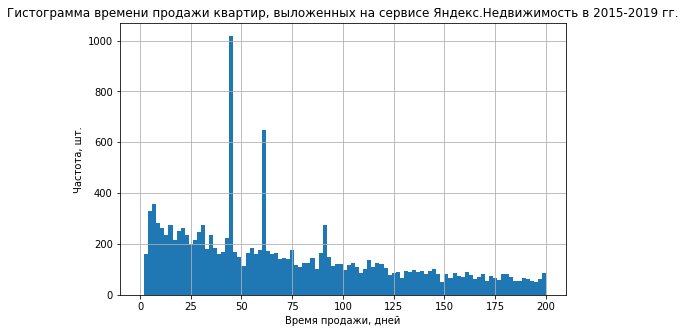

In [43]:
advertisements.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(8, 5), range=(0, 200), legend=False)
plt.title('Гистограмма времени продажи квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Время продажи, дней')
plt.ylabel('Частота, шт.');

Имеем распределение Пуассона. Время продажи находится в диапазоне от 1 до 1580 дней. Медианное значение - 95 дней, среднее значение - 181 дней.

In [44]:
advertisements['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

По гистограмме и методу value_counts() видны аномальные значения на 45, 60, 7, 30 и 90 дней. Скорее всего эти выбросы связаны с автоматической системой снятия объявлений. Как-то обработать эти выбросы довольно сложно, стоит обратиться к составителям данных. В рамках учебного проекта оставим эти выбросы нетронутыми.

Построим диаграмму размаха и оценим выбросы.

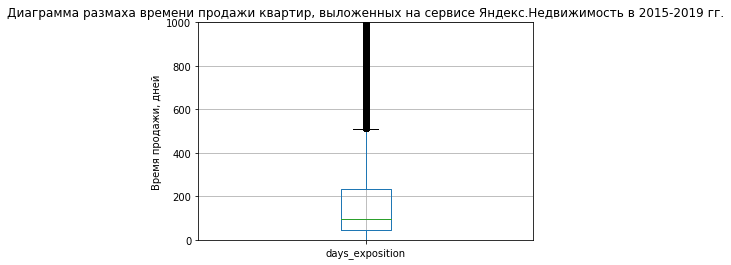

In [45]:
advertisements.boxplot(column = 'days_exposition')
plt.ylim(0,1000)

plt.title('Диаграмма размаха времени продажи квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.ylabel('Время продажи, дней');

plt.show()

По графику выбросы начинаются с 512 дня (Q3 + 1.5*(Q3-Q1)). По гистограмме видно, что распределение довольно пологое, поэтому много значений попадает в выбросы. Оценим количество объявлений за пределами 512 дня

In [46]:
advertisements[advertisements['days_exposition'] > 512]['days_exposition'].count()

1669

1669 значений. Довольно много значений. Повысим границу до 600 дней

In [47]:
advertisements[advertisements['days_exposition'] > 600]['days_exposition'].count()

1198

In [48]:
sorted_advertisements = advertisements[(advertisements['days_exposition'] < 600) | (advertisements['days_exposition'].isna())]

In [49]:
sorted_advertisements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22497 entries, 0 to 23698
Data columns (total 27 columns):
total_images            22497 non-null int8
last_price              22497 non-null int32
total_area              22497 non-null float32
first_day_exposition    22497 non-null datetime64[ns]
rooms                   22497 non-null int8
ceiling_height          13721 non-null float32
floors_total            22415 non-null float32
living_area             20660 non-null float32
floor                   22497 non-null int8
is_apartment            22497 non-null bool
studio                  22497 non-null bool
open_plan               22497 non-null bool
kitchen_area            20300 non-null float32
balcony                 22497 non-null int8
locality_name           22497 non-null object
airports_nearest        17205 non-null float32
cityCenters_nearest     17226 non-null float32
parks_around3000        17227 non-null float32
parks_nearest           7602 non-null float32
ponds_around3000

Оценим теперь новое распределение

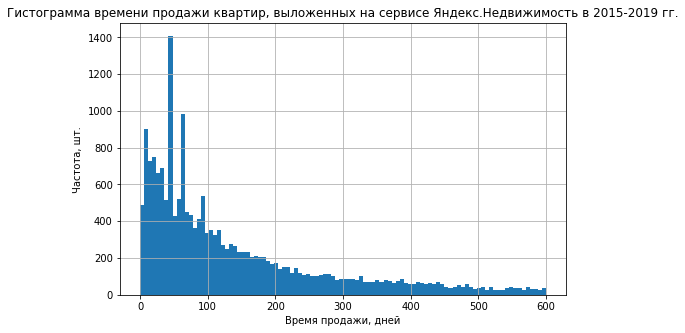

In [50]:
advertisements.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(8, 5), range=(0, 600), legend=False)
plt.title('Гистограмма времени продажи квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Время продажи, дней')
plt.ylabel('Частота, шт.');

Распределение все также осталось показательным

Теперь рассмотрим диаграмму размаха по цене и высоте потолка

In [51]:
sorted_advertisements['last_price'].describe()

count    2.249700e+04
mean     6.439853e+06
std      1.078833e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      7.630000e+08
Name: last_price, dtype: float64

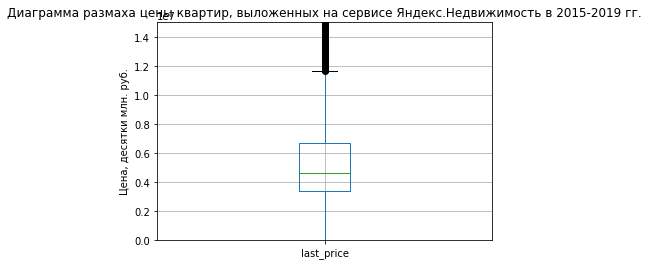

In [52]:
sorted_advertisements.boxplot(column = 'last_price')
plt.ylim(0,0.15e8)
plt.title('Диаграмма размаха цены квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.ylabel('Цена, десятки млн. руб.');
plt.show()

В выбросы попадают квартиры, которые стоят более 11 млн. руб. Оценим число таких квартир

In [53]:
sorted_advertisements[sorted_advertisements['last_price'] > 11000000]['last_price'].count()

2076

Поднимем границу до 15 млн. руб. (тем более такая цена довольно приемлима)

In [54]:
sorted_advertisements[sorted_advertisements['last_price'] > 15000000]['last_price'].count()

1097

Таких квартир довольно мало. Можно принять эту величину за границу. Кроме того не стоит забывать, что минимальная стоимость также выглядит довольно странно. Построим гистограмму в области низких цен и оценим значения.

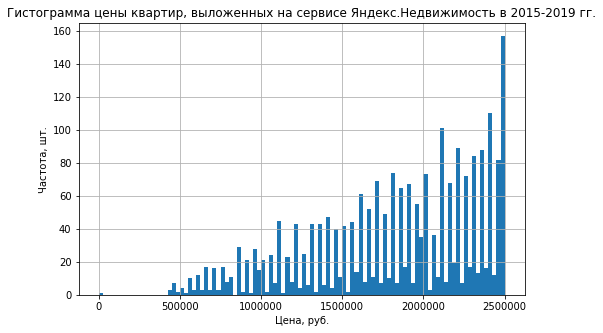

In [55]:
sorted_advertisements.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(8, 5), range=(0, 2500000), legend=False)
plt.title('Гистограмма цены квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Цена, руб.');
plt.ylabel('Частота, шт.');

Думаю, что можно отбросить значения менее 1500000 как неправдоподобные. Количество этих объявлений не такое большое.

In [56]:
sorted_advertisements = sorted_advertisements[((sorted_advertisements['last_price'] < 15000000) & (sorted_advertisements['last_price'] > 1500000)) | (sorted_advertisements['last_price'].isna())]

In [57]:
sorted_advertisements.count()

total_images            20699
last_price              20699
total_area              20699
first_day_exposition    20699
rooms                   20699
ceiling_height          12639
floors_total            20621
living_area             19108
floor                   20699
is_apartment            20699
studio                  20699
open_plan               20699
kitchen_area            18731
balcony                 20699
locality_name           20699
airports_nearest        16086
cityCenters_nearest     16101
parks_around3000        16102
parks_nearest            6814
ponds_around3000        16102
ponds_nearest            7785
days_exposition         18019
price_per_m2            20699
weekday_exp             20699
month_exp               20699
year_exp                20699
floor_cat               20699
dtype: int64

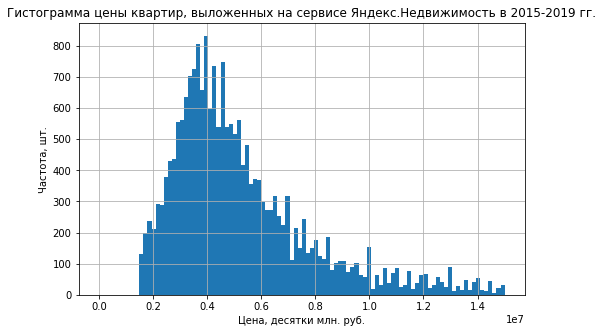

In [58]:
sorted_advertisements.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(8, 5), range=(0, 15000000), legend=False)
plt.title('Гистограмма цены квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Цена, десятки млн. руб.')
plt.ylabel('Частота, шт.');

Теперь рассмотрим высоту потолка

In [59]:
sorted_advertisements['ceiling_height'].describe()

count    12639.000000
mean         2.743408
std          1.023301
min          1.000000
25%          2.500000
50%          2.640000
75%          2.770000
max         32.000000
Name: ceiling_height, dtype: float64

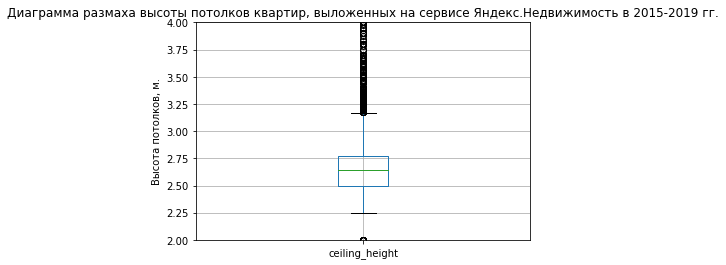

In [60]:
sorted_advertisements.boxplot(column = 'ceiling_height')
plt.ylim(2,4)
plt.title('Диаграмма размаха высоты потолков квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.ylabel('Высота потолков, м.');
plt.show()

В выбросы попадают квартиры с высотой потолка менее 2.25 и более 3.125 метров. По низшей границе вопросов нет. Оценим верхнюю границу.

In [61]:
sorted_advertisements[sorted_advertisements['ceiling_height'] > 3.125]['last_price'].count()

776

Поднимем границу до 3.5 метров

In [62]:
sorted_advertisements = sorted_advertisements[((sorted_advertisements['ceiling_height'] > 2.25) & (sorted_advertisements['ceiling_height'] < 3.5)) | (sorted_advertisements['ceiling_height'].isna())]

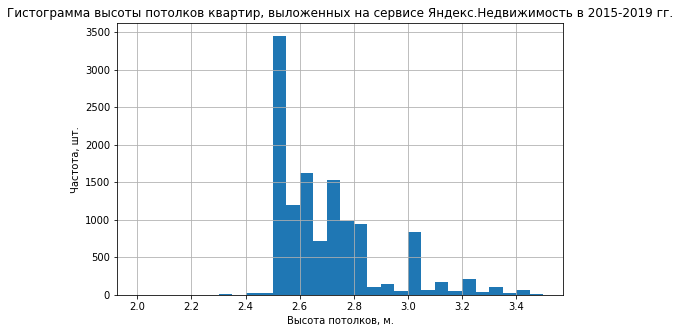

In [63]:
sorted_advertisements.plot(y='ceiling_height', kind='hist', grid=True, figsize=(8, 5), range=(2, 3.5), bins=30, legend=False)
plt.title('Гистограмма высоты потолков квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Частота, шт.');

**Вывод**

Были изучены различные параметры. С помощью графиков распределения и гистограмм были исключены аномально большие и малые величины.

### Факторы влияющие на стоимость квартиры

**Рассмотрим зависимость цены от общей площади. Построим диаграмму рассеяния**

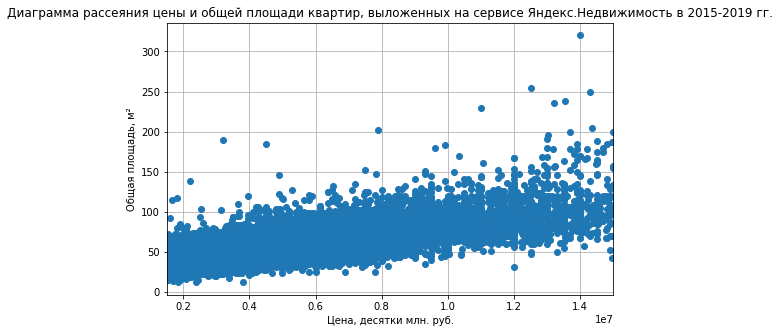

In [64]:
sorted_advertisements.sort_values(by='last_price',ascending=True).plot(x='last_price',y='total_area',grid=True, style='o',figsize=(8,5), legend=False)
plt.title('Диаграмма рассеяния цены и общей площади квартир, выложенных на сервисе Яндекс.Недвижимость в 2015-2019 гг.')
plt.xlabel('Цена, десятки млн. руб.')
plt.ylabel('Общая площадь, м²');

Видна довольно сильная зависимость цены от общей площади помещения. Выразим это численно в линейном коэффициенте корреляции.

In [65]:
sorted_advertisements['total_area'].corr(sorted_advertisements['last_price'])

0.7442278707947351

Коэффициент корреляции 0.74. Зависимость довольно сильная. Чем больше площадь помещения, тем выше стоимость квартиры.

**Рассмотрим зависимость цены от числа комнат. Также построим диаграмму рассеяния и определим коэффициент корреляции**

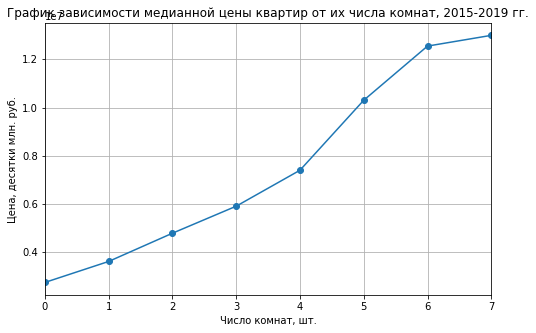

In [66]:
pivot_table_rooms = sorted_advertisements.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
pivot_table_rooms.columns = ['median']
pivot_table_rooms.plot(y = 'median', style = 'o-', grid=True, figsize=(8,5), legend=False)
plt.title('График зависимости медианной цены квартир от их числа комнат, 2015-2019 гг.')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Цена, десятки млн. руб.');

Видна довольно сильная зависимость медианной цены от числа комнат. Выразим это численно в линейном коэффициенте корреляции.

In [67]:
sorted_advertisements['last_price'].corr(sorted_advertisements['rooms'])

0.49055886360869844

Коэффициент корреляции 0.49. Зависимость есть, но меньше, чем от площади квартиры. Чем больше число комнат, тем выше стоимость квартиры.

**Рассмотрим зависимость цены от этажа.**

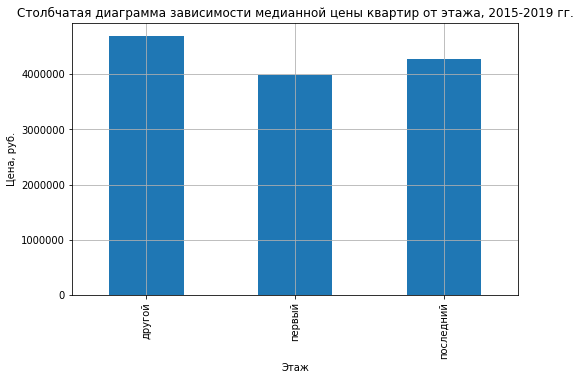

In [68]:
pivot_table_floor = sorted_advertisements.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = 'median')
pivot_table_floor.columns = ['median']
pivot_table_floor.plot(y = 'median', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости медианной цены квартир от этажа, 2015-2019 гг.')
plt.xlabel('Этаж')
plt.ylabel('Цена, руб.');

По графику видно, что медиана цен квартир на первом этаже ниже, чем на последнем. Квартиры, находящиеся на промежуточных этажах в среднем дороже, чем на первых и последних, что подтверждается практическими соображениями

**Рассмотрим зависимость цены от удалённости от центра.**

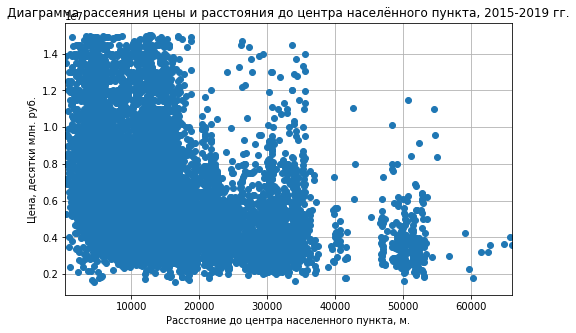

In [69]:
sorted_advertisements.sort_values(by='last_price',ascending=True).plot(x='cityCenters_nearest',y='last_price',grid=True, style='o',figsize=(8,5), legend=False)
plt.title('Диаграмма рассеяния цены и расстояния до центра населённого пункта, 2015-2019 гг.')
plt.xlabel('Расстояние до центра населенного пункта, м.')
plt.ylabel('Цена, десятки млн. руб.');

По графику видно, что чем дальше от центра, тем квартиры дешевле. Выразим это численно в линейном коэффициенте корреляции.

In [70]:
sorted_advertisements['last_price'].corr(sorted_advertisements['cityCenters_nearest'])

-0.33986987164311777

Коэффициент корреляции -0.34. Зависимость не очень явная, но прослеживается.

**Рассмотрим зависимость цены от даты размещения.**

Зависимость цены от дня недели.

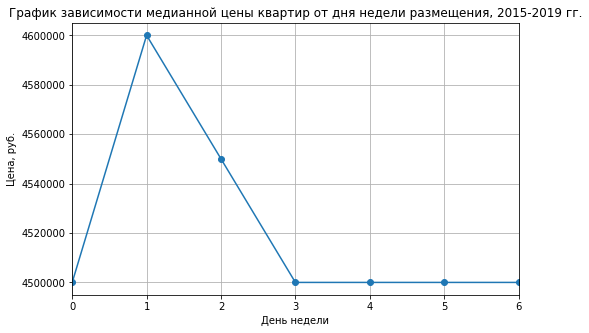

In [71]:
sorted_advertisements.groupby('weekday_exp')['last_price'].median().plot(x='weekday_exp',y='last_price', style='o-',figsize=(8,5), grid=True)
plt.title('График зависимости медианной цены квартир от дня недели размещения, 2015-2019 гг.')
plt.xlabel('День недели')
plt.ylabel('Цена, руб.');

По графику видно, что цена от дня недели размещения объявления зависит мало. Цена немного снижается к выходным. Скорее всего это связано с уменьшением общего числа сделок к выходным.

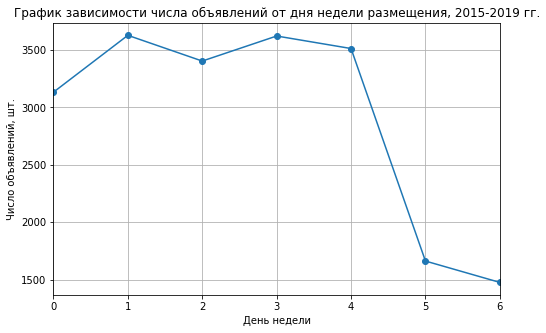

In [72]:
sorted_advertisements.groupby('weekday_exp')['last_price'].count().plot(x='weekday_exp',y='last_price', style='o-',figsize=(8,5), grid=True)
plt.title('График зависимости числа объявлений от дня недели размещения, 2015-2019 гг.')
plt.xlabel('День недели')
plt.ylabel('Число объявлений, шт.');

Зависимость цены от месяца.

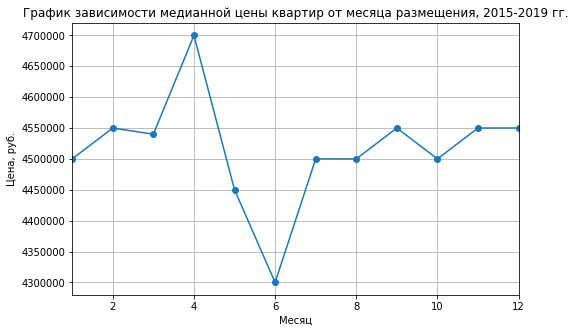

In [73]:
sorted_advertisements.groupby('month_exp')['last_price'].median().plot(x='month_exp',y='last_price', style='o-',figsize=(8,5), grid=True)
plt.title('График зависимости медианной цены квартир от месяца размещения, 2015-2019 гг.')
plt.xlabel('Месяц')
plt.ylabel('Цена, руб.');

По графику видна сезонность рынка недвижимости. Особо выделяется просадка цены в начале лета. Наибольшая цена в апреле. Просадки связаны с периодом отпусков.

Зависимость цены от года.

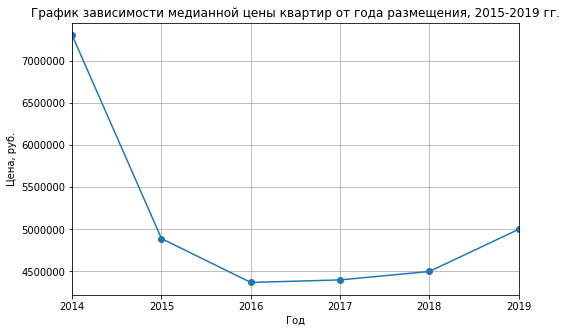

In [74]:
sorted_advertisements.groupby('year_exp')['last_price'].median().plot(x='year_exp',y='last_price', style='o-',figsize=(8,5), grid=True)
plt.title('График зависимости медианной цены квартир от года размещения, 2015-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Цена, руб.');

Медианная стоимость квартир с 2014 года уменьшилась. Для правильной оценки стоит построить график числа продаж от года.

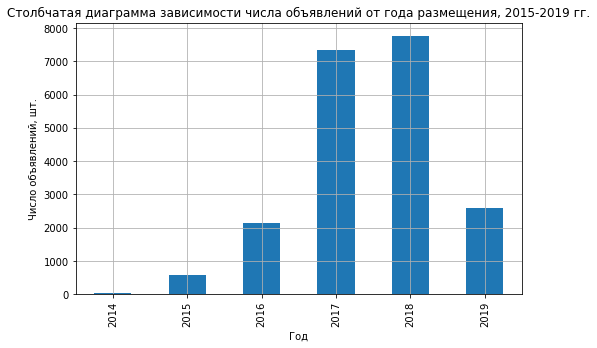

In [75]:
sorted_advertisements.groupby('year_exp')['last_price'].count().plot(x='year_exp',y='last_price', kind = 'bar',figsize=(8,5), grid=True)
plt.title('Столбчатая диаграмма зависимости числа объявлений от года размещения, 2015-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Число объявлений, шт.');

По графику видно, что продаж в 2014 году было очень мало, то есть выборка нерепрезентативная. 

В целом цена квартир упала к 2016, а затем снова выросла до рекордных значений в 2019. Можно предположить, что с учетом дефицита на рынке стройматериалов и коронакризисом, медианная цена в 2020-2021 гг. выросла еще больше.

**Вывод**

Было выявлено влияние различных факторов на стоимость квартиры.
- Цена прямо пропорционально зависит от площади (corr = 0.74);
- Цена прямо пропорционально зависит от числа комнат (corr = 0.49);
- Цена квартир на промежуточных этажах больше, чем на первом и последнем, а на последнем больше, чем на первом;
- Цена обратно пропорционально зависит от удаленности от центра (corr = -0.34);
- Цена снижается к выходным из-за общего снижения деловой активности;
- Рынку недвижимости пресуща сезонность. Цена снижается к периоду отпусков и повышается после них;
- Цена снизилась к 2016 году, но с тех пор неуклонно повышается.

### 10 населенных пунктов с наибольшим количеством объявлений

Получим топ 10 насёленных пунктов по количеству объявлений с медианной ценой за квадратный метр по этим населённым пунктам.

In [76]:
counts_locations = sorted_advertisements.pivot_table(index='locality_name',values='price_per_m2',aggfunc=('count','mean'))
most_counts_locations = counts_locations.sort_values(by='count',ascending=False).head(10)
most_counts_locations

,count,mean
locality_name,,
Санкт-Петербург,13557.0,106950.343734
поселок Мурино,534.0,85788.116105
поселок Шушары,424.0,78615.106132
Всеволожск,368.0,67369.192935
Колпино,328.0,75206.838415
Пушкин,324.0,100726.503086
поселок Парголово,317.0,90106.192429
Гатчина,281.0,69891.494662
поселок Кудрово,276.0,92706.181159


Населённые пункты с самой высокой и низкой средней стоимостью жилья из топ-10 по количеству объявлений

In [77]:
most_counts_locations[most_counts_locations['mean'] == most_counts_locations['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,13557.0,106950.343734


In [78]:
most_counts_locations[most_counts_locations['mean'] == most_counts_locations['mean'].min()]

,count,mean
locality_name,,
Выборг,204.0,58962.52451


**Вывод**

Была построена таблицы с медианной ценой населённых пунктов из топ-10 по количеству объявлений. Определены населённые пункты с самой высокой и низкой стоимостью из этих топ-10

### Изучение предложения квартир

Выделим квартиры в Санкт-Петербурге

In [79]:
Saint_Petersburg_advertisements = sorted_advertisements[sorted_advertisements['locality_name'] == 'Санкт-Петербург']

Добавим столбец с расстоянием до центра в км.

In [80]:
# Убрать ложное срабатывание SettingWithCopyWarning
pd.options.mode.chained_assignment = None
Saint_Petersburg_advertisements['cityCenters_km'] = (Saint_Petersburg_advertisements['cityCenters_nearest'] / 1000).round()
pd.options.mode.chained_assignment = 'warn'

Посчитаем среднюю цену для каждого километра

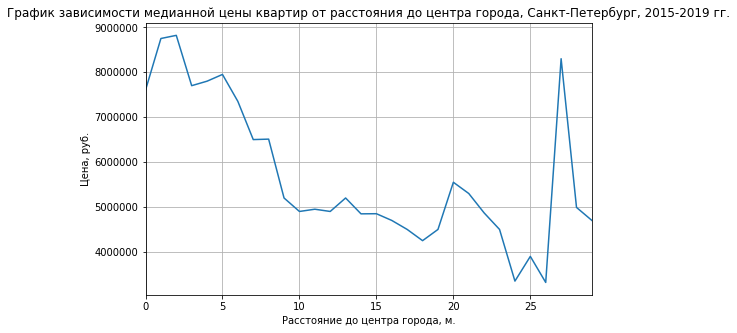

In [81]:
pivot_km = Saint_Petersburg_advertisements.pivot_table(index='cityCenters_km', values='last_price', aggfunc = 'median')
pivot_km.plot(grid=True, figsize=(8,5), legend=False)
plt.title('График зависимости медианной цены квартир от расстояния до центра города, Санкт-Петербург, 2015-2019 гг.')
plt.xlabel('Расстояние до центра города, м.')
plt.ylabel('Цена, руб.');

**Вывод**

Центром можно считать круг с радиусом 9-10 км.

Выделим сегмент квартир в центре

In [82]:
Saint_Petersburg_center_advertisements = Saint_Petersburg_advertisements[Saint_Petersburg_advertisements['cityCenters_km'] < 9]

Изучим параметры квартир в центре

In [83]:
Saint_Petersburg_center_advertisements.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,2722.0,9.700955e+00,5.658692e+00,0.0,6.00,9.0,14.00,3.200000e+01
last_price,2722.0,7.932184e+06,2.868201e+06,1600000.0,5790000.00,7500000.0,9889561.75,1.499000e+07
total_area,2722.0,6.903091e+01,2.724319e+01,12.0,48.00,65.5,85.00,2.550000e+02
rooms,2722.0,2.389052e+00,1.076800e+00,0.0,2.00,2.0,3.00,7.000000e+00
ceiling_height,1685.0,2.927044e+00,2.557722e-01,2.4,2.72,3.0,3.10,3.490000e+00
floors_total,2717.0,7.674273e+00,4.492620e+00,2.0,5.00,6.0,9.00,2.800000e+01
living_area,2521.0,4.070708e+01,1.958774e+01,2.0,27.00,37.0,51.50,1.539000e+02
floor,2722.0,4.322557e+00,3.182828e+00,1.0,2.00,4.0,5.00,2.400000e+01
kitchen_area,2461.0,1.161004e+01,5.526901e+00,2.0,8.00,10.2,13.80,1.007000e+02
balcony,2722.0,3.225569e-01,7.352107e-01,0.0,0.00,0.0,0.00,5.000000e+00


**Зависимость цены от площади**

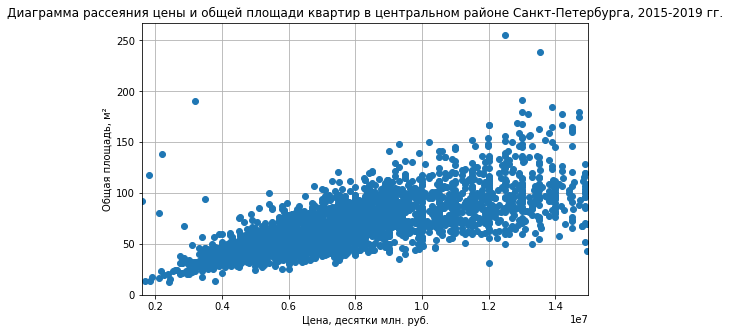

In [84]:
Saint_Petersburg_center_advertisements.sort_values(by='last_price',ascending=True).plot(x='last_price',y='total_area',grid=True, style='o',figsize=(8,5), legend=False)
plt.title('Диаграмма рассеяния цены и общей площади квартир в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('Цена, десятки млн. руб.')
plt.ylabel('Общая площадь, м²');

In [85]:
Saint_Petersburg_center_advertisements['total_area'].corr(Saint_Petersburg_center_advertisements['last_price'])

0.7257919342638989

Зависимость цены от общей площади и график рассеяния похож на общую выборку

**Зависимость цены от числа комнат**

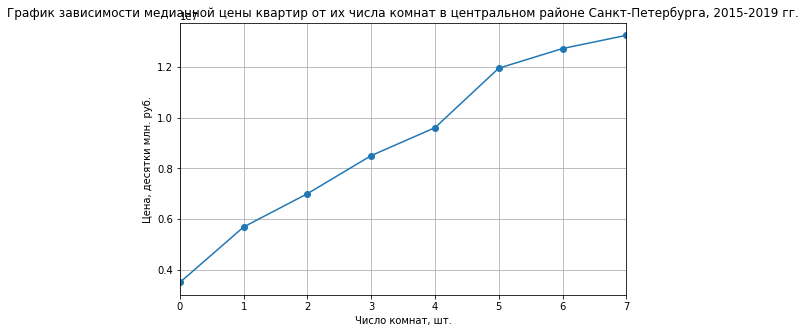

In [86]:
pivot_table_rooms_spb = Saint_Petersburg_center_advertisements.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
pivot_table_rooms_spb.columns = ['median']
pivot_table_rooms_spb.plot(y = 'median', style = 'o-', grid=True, figsize=(8,5), legend=False)
plt.title('График зависимости медианной цены квартир от их числа комнат в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Цена, десятки млн. руб.');

In [87]:
Saint_Petersburg_center_advertisements['rooms'].corr(Saint_Petersburg_center_advertisements['last_price'])

0.5178881296753896

Зависимость цены от числа комнат похожа на общую выборку. В среднем цена выше, чем в остальной выборке, что неудивительно.

**Зависимость цены от этажа**

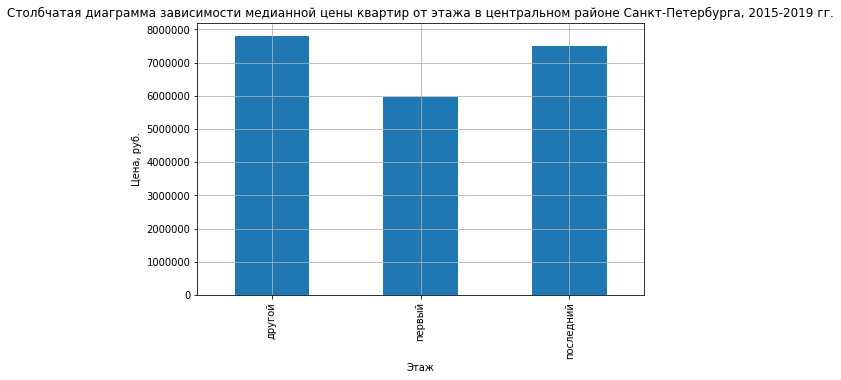

In [88]:
pivot_table_floor = Saint_Petersburg_center_advertisements.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = 'median')
pivot_table_floor.columns = ['median']
pivot_table_floor.plot(y = 'median', kind = 'bar', grid=True, figsize=(8,5), legend=False)
plt.title('Столбчатая диаграмма зависимости медианной цены квартир от этажа в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('Этаж')
plt.ylabel('Цена, руб.');

Зависимость такая же

**Зависимость цены от расстояния до центра**

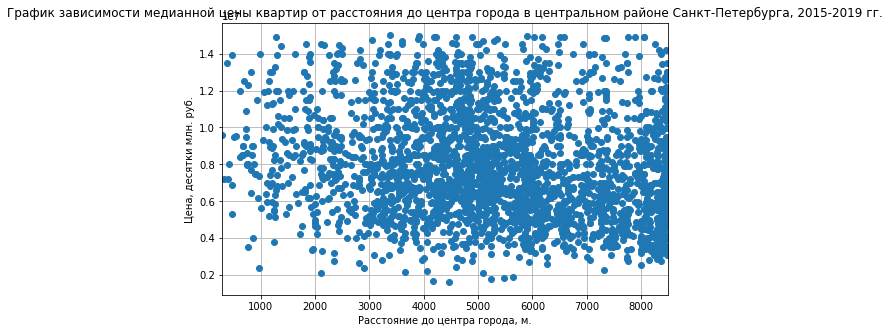

In [89]:
Saint_Petersburg_center_advertisements.sort_values(by='last_price',ascending=True).plot(x='cityCenters_nearest',y='last_price',grid=True, style='o',figsize=(8,5), legend=False)
plt.title('График зависимости медианной цены квартир от расстояния до центра города в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('Расстояние до центра города, м.')
plt.ylabel('Цена, десятки млн. руб.');

In [90]:
Saint_Petersburg_center_advertisements['cityCenters_nearest'].corr(Saint_Petersburg_center_advertisements['last_price'])

-0.18493587623368438

Зависимость цены от расстояния до центра слабее, так как вся эта зона по сути центральная и внутри этой зоны уже не так важно как расположена квартира.

**Зависимость цены от даты размещения объявления**

Зависимость цены от дня недели.

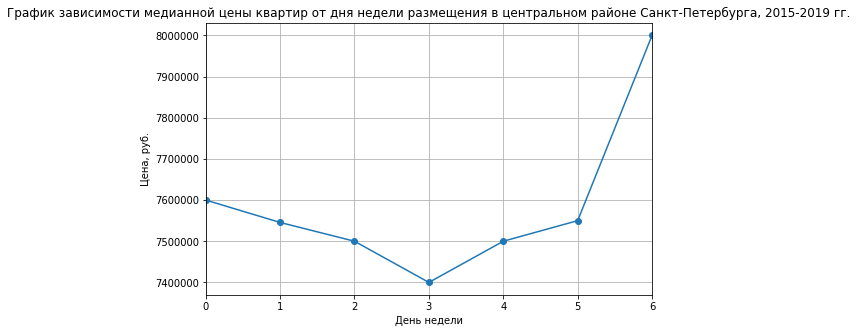

In [91]:
Saint_Petersburg_center_advertisements.groupby('weekday_exp')['last_price'].median().plot(x='weekday_exp',y='last_price', style='o-',figsize=(8,5), grid=True)
plt.title('График зависимости медианной цены квартир от дня недели размещения в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('День недели')
plt.ylabel('Цена, руб.');

График по сравнению с общей выборкой изменился. Цена снижается к четвергу и повышвется к концу и началу недели. Рассмотрим график числа сделок от дня недели.

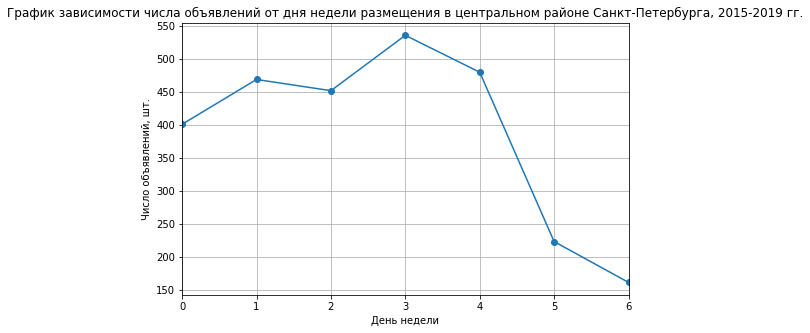

In [92]:
Saint_Petersburg_center_advertisements.groupby('weekday_exp')['last_price'].count().plot(x='weekday_exp',y='last_price', style='o-',figsize=(8,5), grid=True)
plt.title('График зависимости числа объявлений от дня недели размещения в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('День недели')
plt.ylabel('Число объявлений, шт.');

График схож с общей выборкой. Число сделок в выходные мало, поэтому выборка в конце недели не очень репрезентативная и медианная цена взлетает вверх.

Зависимость цены от месяца.

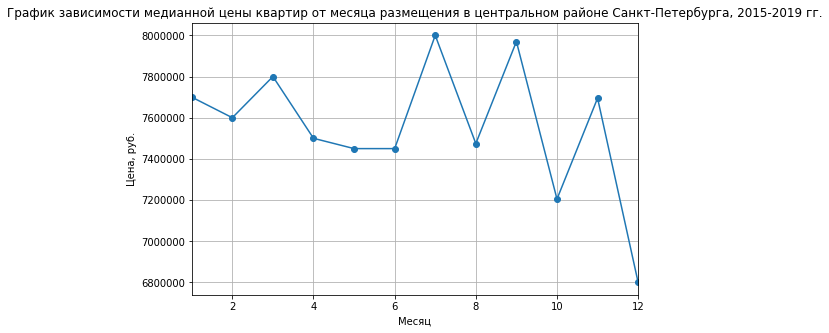

In [93]:
Saint_Petersburg_center_advertisements.groupby('month_exp')['last_price'].median().plot(x='month_exp',y='last_price', style='o-',figsize=(8,5), grid=True)
plt.title('График зависимости медианной цены квартир от месяца размещения в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('Месяц')
plt.ylabel('Цена, руб.');

В центре сезонность рынка недвижимости другая. Цена падает в конце года и возрастает в начале года.

Зависимость цены от года.

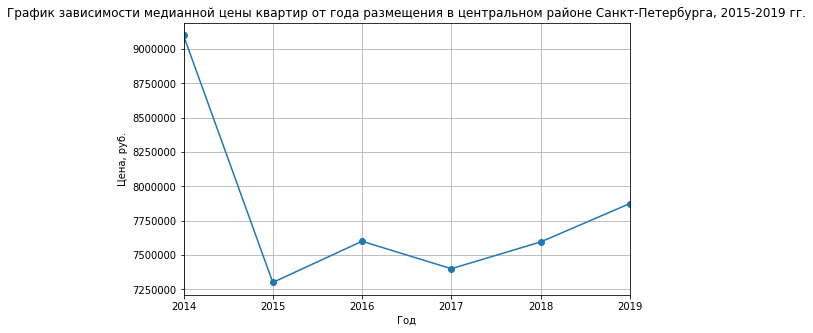

In [94]:
Saint_Petersburg_center_advertisements.groupby('year_exp')['last_price'].median().plot(x='year_exp',y='last_price', style='o-',figsize=(8,5), grid=True)
plt.title('График зависимости медианной цены квартир от года размещения в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Цена, руб.');

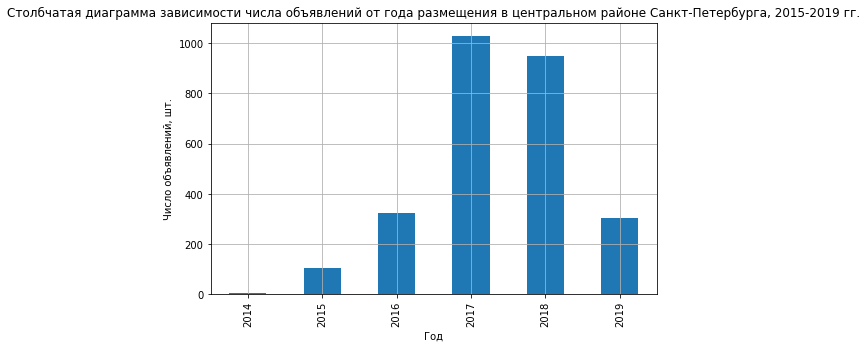

In [95]:
Saint_Petersburg_center_advertisements.groupby('year_exp')['last_price'].count().plot(x='year_exp',y='last_price', kind = 'bar',figsize=(8,5), grid=True)
plt.title('Столбчатая диаграмма зависимости числа объявлений от года размещения в центральном районе Санкт-Петербурга, 2015-2019 гг.')
plt.xlabel('Год')
plt.ylabel('Число объявлений, шт.');

Графики схожи с общей выборкой. В целом виден общей тренд роста цен квартир.

## Общий вывод

1. Были исследованы объявления о прадаже квартир сервиса Яндекс.Недвижимость; 
2. Оценены данные в целом, определены пропущенные значения. В случае наличия логичной замены эти пропуски были заполнены; Остальные остались нетронутыми, чтобы не повлиять на результат исследования;
3. Изменены типы данных в соответствии с логикой данных в столбцах для уменьшения памяти для хранения;
4. Таблица была дополнена необходимыми для исследования столбцами;
5. Были исследованы распределения параметров в таблице, построены гистограммы и графики распределения, отброшены аномальные выбросы в данных;
6. Исследованы факторы влияющие на цену квартиры:
- Цена прямо пропорционально зависит от площади (corr = 0.74);
- Цена прямо пропорционально зависит от числа комнат (corr = 0.49);
- Цена квартир на промежуточных этажах больше, чем на первом и последнем, а на последнем больше, чем на первом;
- Цена обратно пропорционально зависит от удаленности от центра (corr = -0.34);
- Цена снижается к выходным из-за общего снижения деловой активности;
- Рынку недвижимости пресуща сезонность. Цена снижается к периоду отпусков и повышается после них;
- Цена снизилась к 2016 году, но с тех пор неуклонно повышается.
7. Были выделены 10 населенных пунктов с наибольшим числом обявлений и среди них определены населенные пункты с наибольшей и наименьшей ценой жилья (наибольшая - Санкт-Петербург, наименьшая - Выборг);
8. Определена центральная зона в Санкт-Петербурге по перепаду цены в зависимости от расстояния от центра.
9. Для этой центральной зоны были проанализированы те же параметры, что и для общей выборки. В целом поведение этих параметров похоже, кроме зависимости цены от расстояния до центра, поскольку центральная зона уже выделена, а внутри центра цена изменяется меньше. Кроме того для центра Санкт-Петербурга характерна немного другая сезонность рынка продаж и зависмость от года продажи и дня недели.